In [1]:
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def show_error_distribution(filename, format_):
    error_prob = []
    for read in SeqIO.parse(filename, format_):
        error_prob.append([10 ** (-x/10) 
                           for x in read.letter_annotations["phred_quality"]])
        
    error_prob = list(map(list, zip(*error_prob)))
    n_pos = len(error_prob)
    middle = int(n_pos / 2)
    
    def __set_colors(size, bp):
        for i in range(size):
            plt.setp(bp['boxes'][i], color='blue')
            plt.setp(bp['caps'][i], color='blue')
            plt.setp(bp['whiskers'][i], color='blue')
            plt.setp(bp['medians'][i], color='red')

    plt.figure(figsize=(15,15))
    plt.subplot(2,1,1)
    plt.title("Распределение вероятности ошибки " 
              "для нуклеотидов в позициях 1-{} в файле {}".format(middle, filename))
    bp = plt.boxplot(error_prob[:middle], 
                     positions=[i for i in range(1, middle+1)], 
                     showfliers=False)
    __set_colors(middle, bp)
    plt.xticks(rotation=40, fontsize=7)

    plt.subplot(2, 1,2)
    plt.title("Распределение вероятности ошибки "
              "для нуклеотидов в позициях {}-{} в файле {}".format(middle + 1, n_pos, filename))
    bp = plt.boxplot(error_prob[middle:], 
                     positions=[i for i in range(middle+1, n_pos+1)], 
                     showfliers=False)
    __set_colors(n_pos-middle, bp)
    plt.xticks(rotation=40, fontsize=7)
    plt.show()

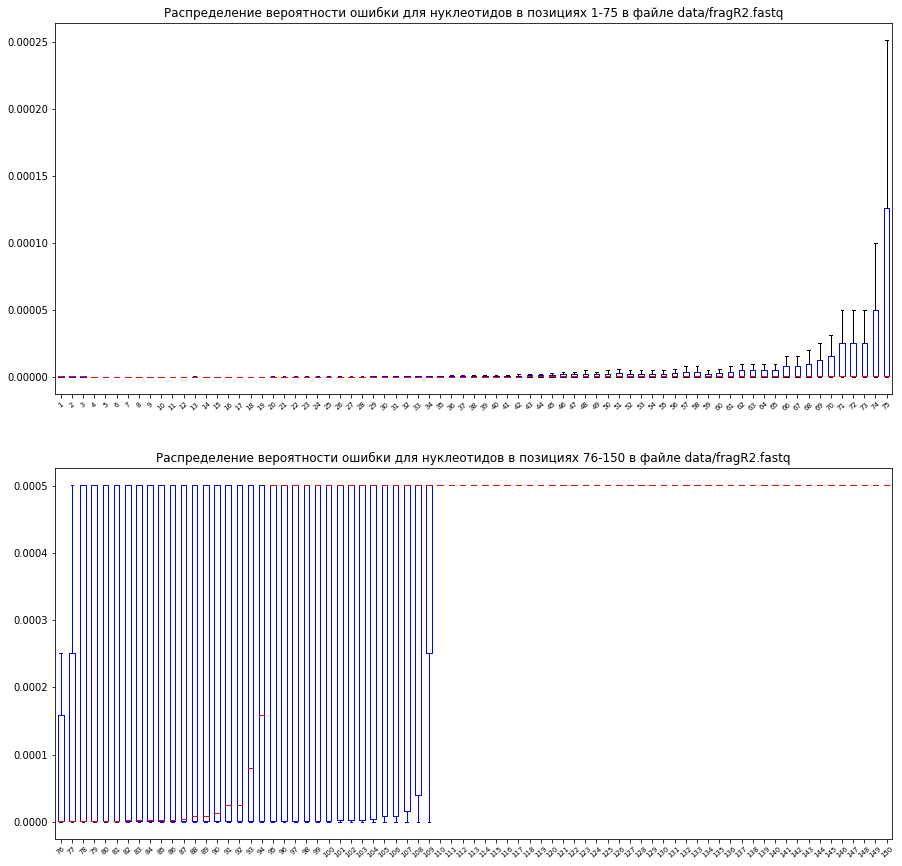

In [3]:
show_error_distribution("data/fragR2.fastq", "fastq")